In [1]:
import pandas as pd
import numpy as np
import scipy as sci
import seaborn as sns
import matplotlib.pyplot as pplt
import matplotlib as plt
from pycaret.classification import *

In [2]:
data = pd.read_csv("star_classification.csv")

In [3]:
data["class"].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

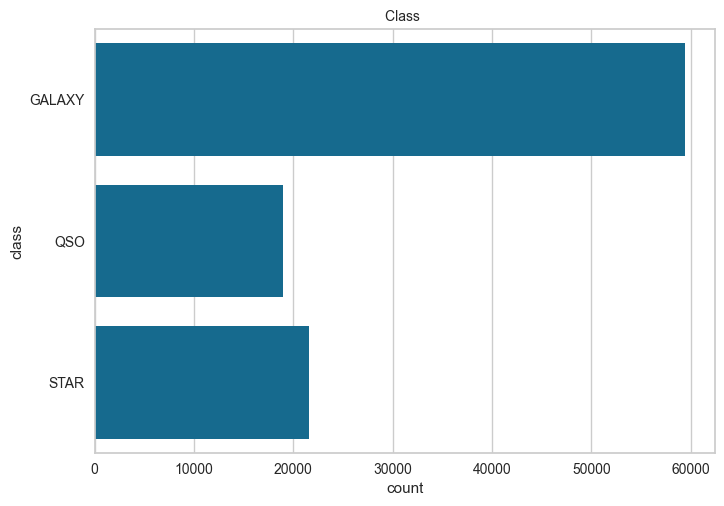

In [4]:
sns.countplot(data["class"])
pplt.title("Class ",fontsize=10)
pplt.show()

In [5]:
data["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in data["class"]]

In [6]:
data.corr(numeric_only=True)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
obj_ID,1.000000,-0.013735,-0.301237,0.015310,0.015710,0.153891,0.147670,0.013811,1.000000,NaN,-0.046997,0.031498,0.239461,-0.000047,0.065400,0.239460,0.262687,0.067178
alpha,-0.013735,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,-0.013737,NaN,0.019582,-0.165577,-0.002553,0.004552,0.001667,-0.002554,0.019943,0.030464
delta,-0.301237,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,-0.301238,NaN,0.032565,-0.173416,0.112329,0.056643,0.031638,0.112329,0.107333,0.028250
u,0.015310,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.015309,NaN,0.003548,-0.008374,0.029997,-0.017701,0.014309,0.029997,0.031997,0.016305
g,0.015710,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.015710,NaN,0.003508,-0.008852,0.039443,-0.005915,0.022954,0.039443,0.040274,0.017470
r,0.153891,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.153889,NaN,0.008480,-0.026423,0.655245,0.150691,0.433241,0.655243,0.671180,0.223106
i,0.147670,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.147668,NaN,0.007615,-0.026679,0.661641,0.284396,0.492383,0.661640,0.672523,0.214787
z,0.013811,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.013811,NaN,0.003365,-0.008903,0.037813,0.017352,0.030380,0.037813,0.037469,0.014668
run_ID,1.000000,-0.013737,-0.301238,0.015309,0.015710,0.153889,0.147668,0.013811,1.000000,NaN,-0.047098,0.031498,0.239460,-0.000049,0.065400,0.239459,0.262687,0.067165
rerun_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data = data.drop(["rerun_ID"], axis=1)

Removendo outliers

In [8]:
# Removendo outliers com IQR
shape_antes = data.shape
for i in data.columns:
  if pd.api.types.is_numeric_dtype(data[i]):
    quartil_3 = data[i].quantile(0.75)
    quartil_1 = data[i].quantile(0.25)
    iqr = quartil_3 - quartil_1
    superior = quartil_3 + (1.5*iqr)
    inferior = quartil_1 - (1.5*iqr)
    minimo_outlier = data[data[i]<inferior].index
    maximo_outlier = data[data[i]>superior].index
    data.drop(minimo_outlier, inplace=True)
    data.drop(maximo_outlier, inplace=True)
  else:
    pass

shape_depois = data.shape

outliers = shape_antes[0] - shape_depois[0]
print(f"O dataset tinha {outliers} outliers")


O dataset tinha 14266 outliers


Seleção de features

In [9]:
data = data.drop(["alpha","run_ID","obj_ID","cam_col","fiber_ID","delta","field_ID"],axis=1)

In [10]:
correlacao = data.corr(method="pearson")
correlacao["class"].sort_values()

u             -0.263240
g             -0.125921
r              0.054022
MJD            0.131263
spec_obj_ID    0.143202
plate          0.143203
i              0.172127
redshift       0.226857
z              0.232381
class          1.000000
Name: class, dtype: float64

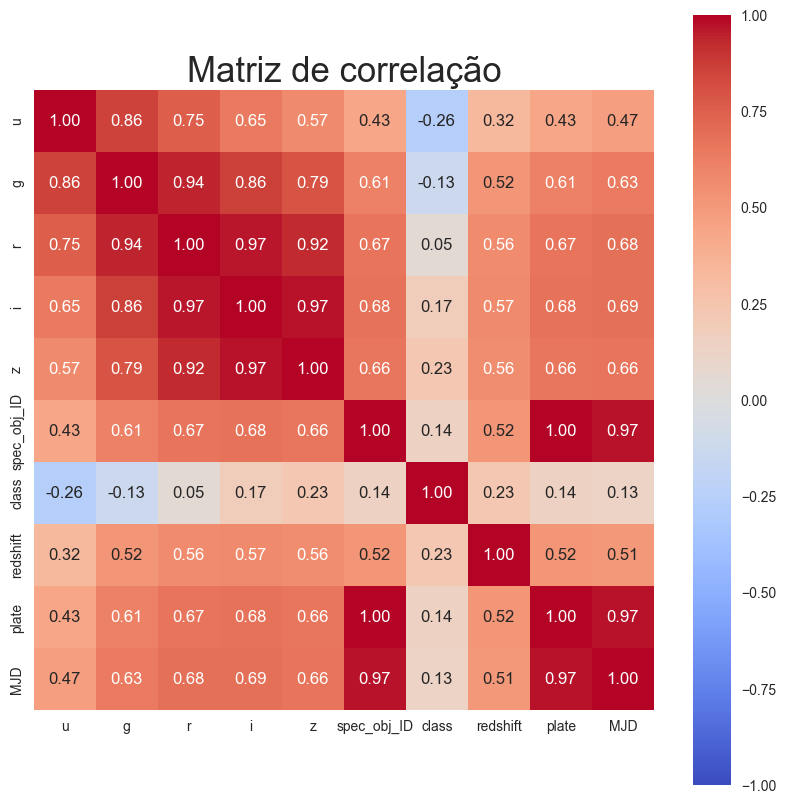

In [11]:
corr_matt=data.corr(method="pearson",numeric_only=True)
pplt.figure(figsize=(10,10))
sns.heatmap(corr_matt,annot=True,fmt="0.2f",cmap="coolwarm",square=True,vmin=-1,vmax=1)
pplt.title("Matriz de correlação",fontsize=25)
pplt.show()

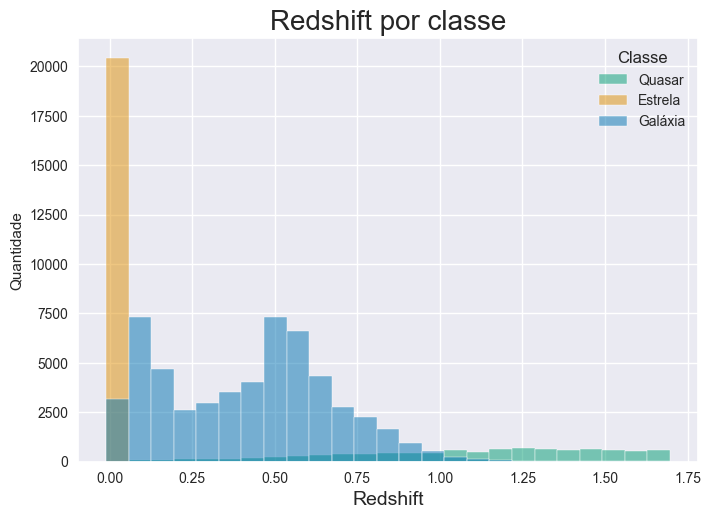

In [12]:
sns.set_style('darkgrid')
sns.histplot(data=data,x='redshift',hue='class',palette='colorblind',bins=25)
pplt.xlabel('Redshift',fontsize=14)
pplt.ylabel('Quantidade')
pplt.title('Redshift por classe',fontsize=20)
pplt.legend(title='Classe',labels = ['Quasar','Estrela','Galáxia'])

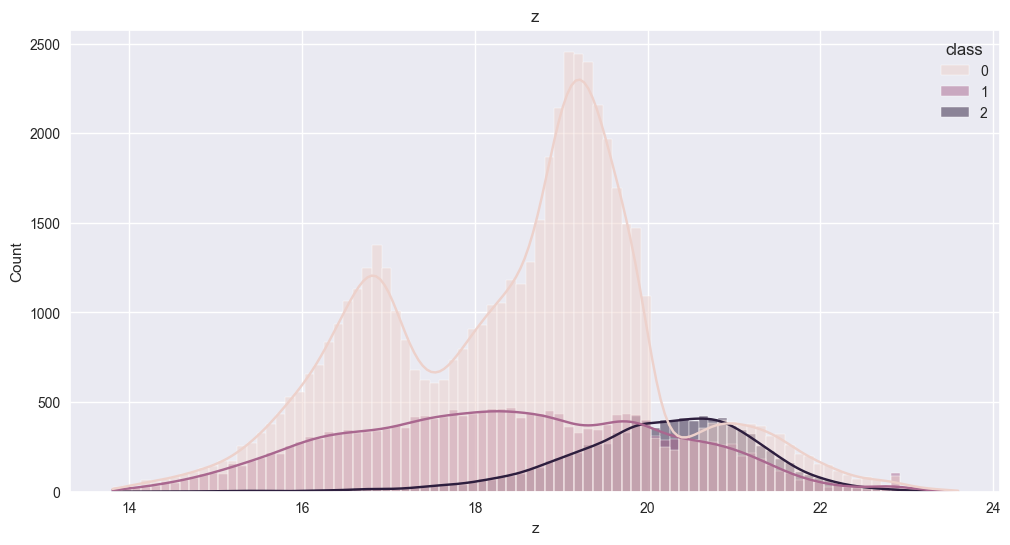

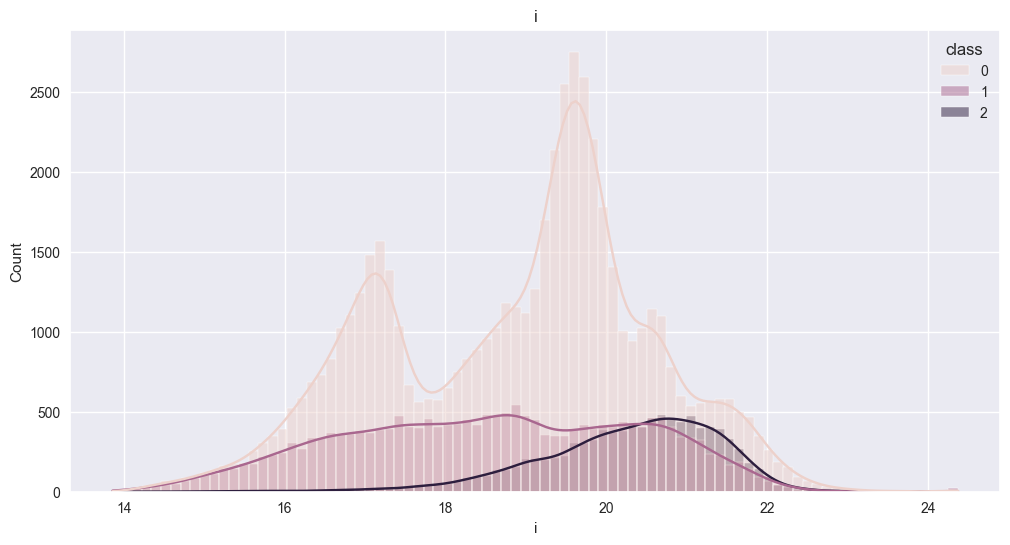

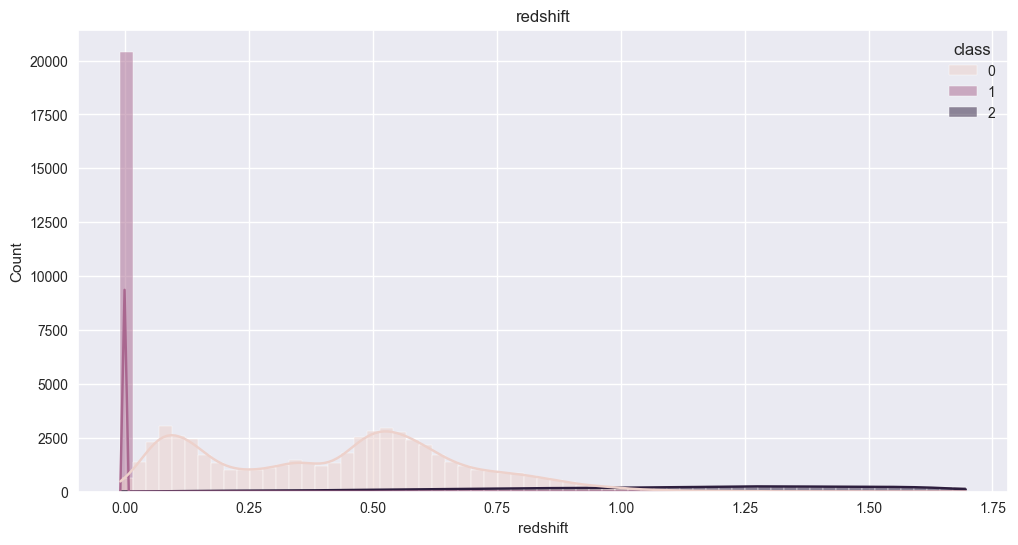

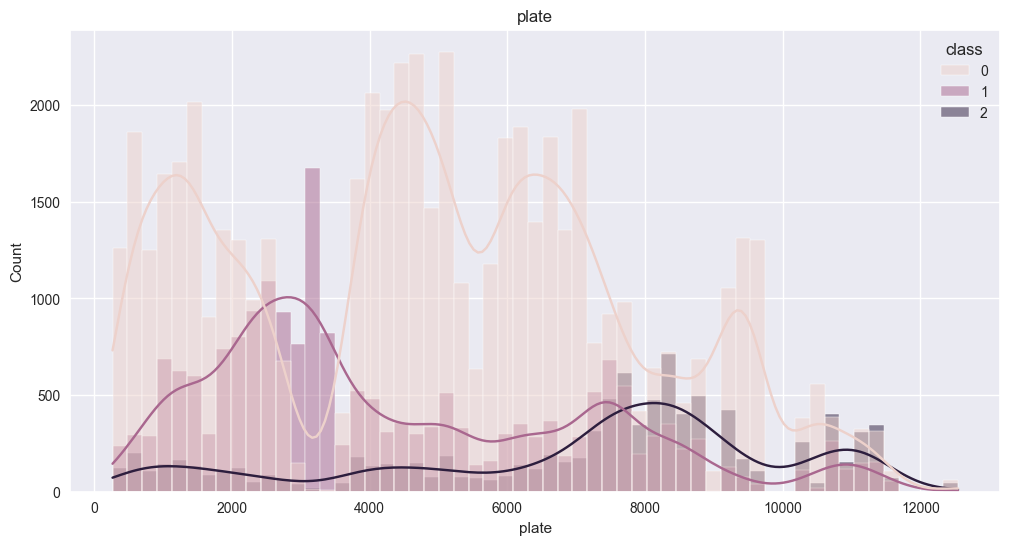

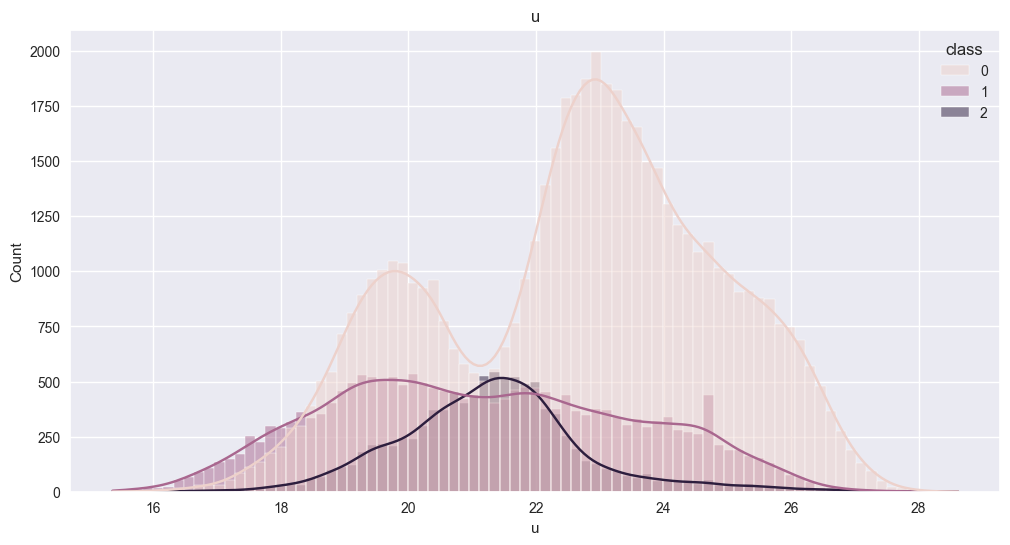

In [13]:
for i in ['z', 'i','redshift', 'plate', 'u']:
    pplt.figure(figsize=(12,6))
    sns.histplot(data=data, x=i, kde=True, hue="class")
    pplt.title(i)
    pplt.show()

In [14]:
#Treinamento dos modelos de machine learning

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

Divisão de treinamento (70/30)

In [15]:
#Divisao de treinamento
treino, teste = train_test_split(data,test_size=0.3,random_state=123)

In [16]:
#Modelos
ambiente = setup(data=treino,target='class',session_id=123,use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3050 6GB Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Original data shape,"(60013, 10)"
4,Transformed data shape,"(60013, 10)"
5,Transformed train set shape,"(42009, 10)"
6,Transformed test set shape,"(18004, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3050 6GB Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

In [17]:
#EBG
ebg = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9733,0.9916,0.9733,0.9731,0.9732,0.9474,0.9474
1,0.9748,0.9936,0.9748,0.9744,0.9743,0.9499,0.9502
2,0.9736,0.9926,0.9736,0.9734,0.9734,0.9481,0.9481
3,0.9755,0.9939,0.9755,0.9751,0.9751,0.9514,0.9516
4,0.9733,0.9938,0.9733,0.9729,0.9730,0.9474,0.9474
5,0.9807,0.9951,0.9807,0.9806,0.9807,0.9621,0.9621
6,0.9726,0.9928,0.9726,0.9723,0.9724,0.9460,0.9461
7,0.9769,0.9952,0.9769,0.9767,0.9765,0.9543,0.9544
8,0.9733,0.9933,0.9733,0.9730,0.9730,0.9473,0.9474


In [18]:
tuned_ebg = tune_model(ebg)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


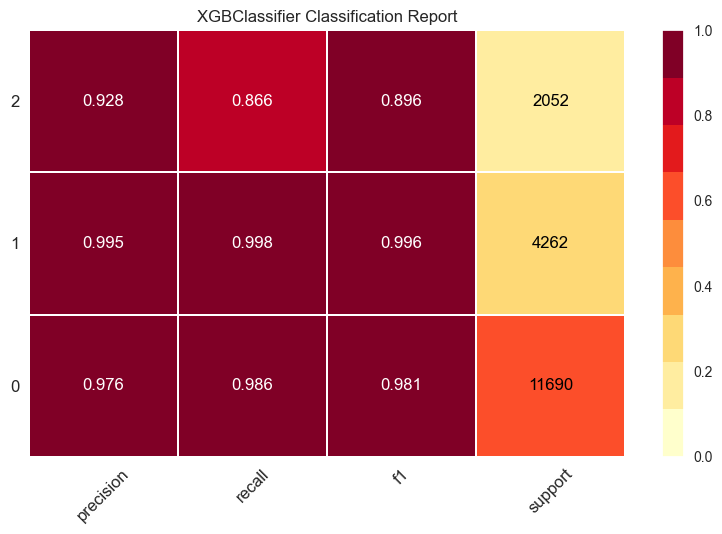

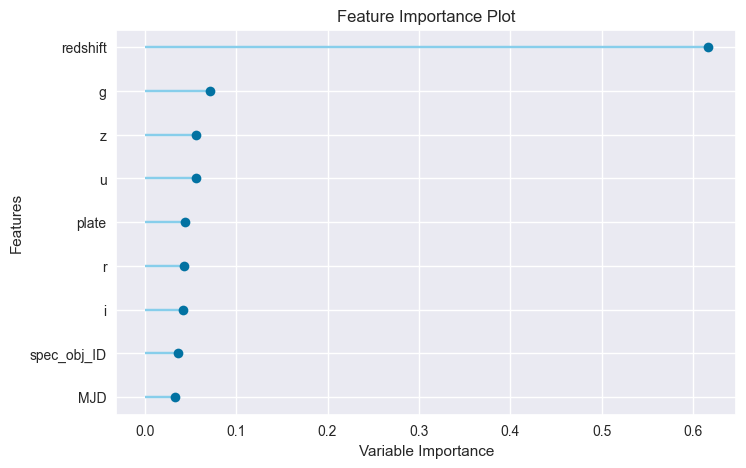

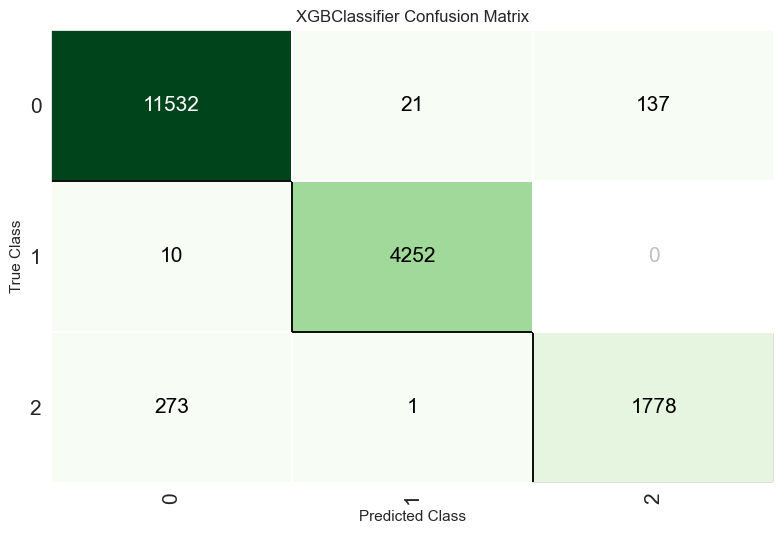

In [19]:
plot_model(tuned_ebg,plot='class_report')
plot_model(tuned_ebg,plot='feature')
plot_model(tuned_ebg,plot='confusion_matrix')

In [20]:
previsao_ebg = predict_model(tuned_ebg,data=teste)
truelabels_ebg = previsao_ebg['class']
prevlabels_ebg = previsao_ebg['prediction_label']
matriz_ebg = confusion_matrix(truelabels_ebg,prevlabels_ebg)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9766,0.9947,0.9766,0.9763,0.9764,0.9540,0.9541


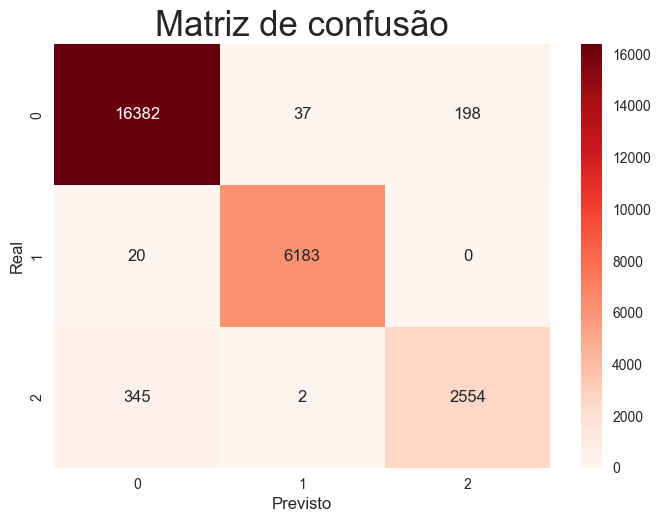

<Figure size 1000x1000 with 0 Axes>

In [21]:
sns.heatmap(matriz_ebg,annot=True,fmt='d',cmap='Reds')
pplt.xlabel('Previsto',fontsize=12)
pplt.ylabel('Real',fontsize=12)
pplt.title('Matriz de confusão',fontsize=25)
pplt.figure(figsize=(10,10))
pplt.show()

In [22]:
report_ebg = classification_report(truelabels_ebg,prevlabels_ebg)
print(report_ebg)
print(type(report_ebg))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     16617
           1       0.99      1.00      1.00      6203
           2       0.93      0.88      0.90      2901

    accuracy                           0.98     25721
   macro avg       0.97      0.95      0.96     25721
weighted avg       0.98      0.98      0.98     25721

<class 'str'>


Modelo de Floresta aleatoria

In [23]:
floresta=create_model('rf',n_estimators=50,max_depth=5,random_state=123)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9619,0.9886,0.9619,0.9612,0.9605,0.9238,0.9247
1,0.9612,0.9904,0.9612,0.9612,0.9594,0.9220,0.9234
2,0.9631,0.9885,0.9631,0.9623,0.9621,0.9266,0.9271
3,0.9607,0.9912,0.9607,0.9602,0.9591,0.9214,0.9223
4,0.9610,0.9900,0.9610,0.9603,0.9596,0.9220,0.9228
5,0.9700,0.9928,0.9700,0.9697,0.9690,0.9401,0.9408
6,0.9626,0.9904,0.9626,0.9619,0.9617,0.9258,0.9262
7,0.9645,0.9931,0.9645,0.9642,0.9632,0.9291,0.9299
8,0.9593,0.9912,0.9593,0.9587,0.9576,0.9184,0.9195


In [24]:
rf_boost = ensemble_model(floresta, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9743,0.0000,0.9743,0.9738,0.9739,0.9491,0.9493
1,0.9741,0.0000,0.9741,0.9737,0.9735,0.9485,0.9488
2,0.9731,0.0000,0.9731,0.9727,0.9728,0.9470,0.9470
3,0.9717,0.0000,0.9717,0.9711,0.9711,0.9438,0.9441
4,0.9712,0.0000,0.9712,0.9707,0.9708,0.9430,0.9432
5,0.9793,0.0000,0.9793,0.9790,0.9791,0.9591,0.9592
6,0.9729,0.0000,0.9729,0.9725,0.9727,0.9466,0.9466
7,0.9755,0.0000,0.9755,0.9751,0.9750,0.9514,0.9516
8,0.9741,0.0000,0.9741,0.9736,0.9736,0.9486,0.9488


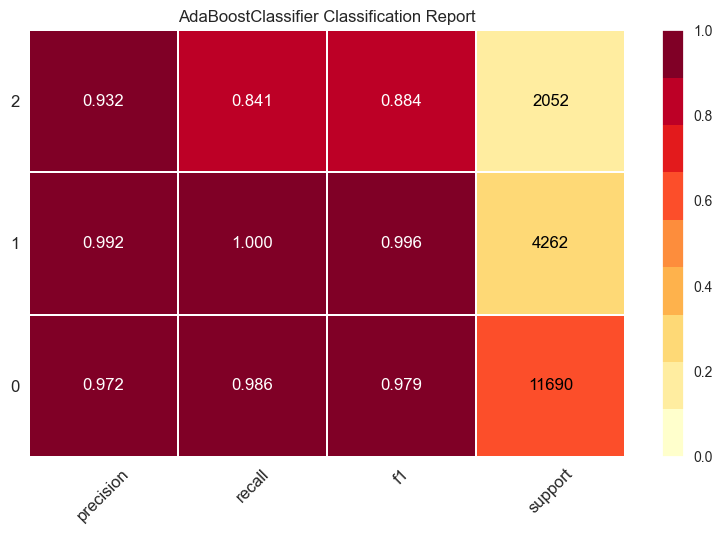

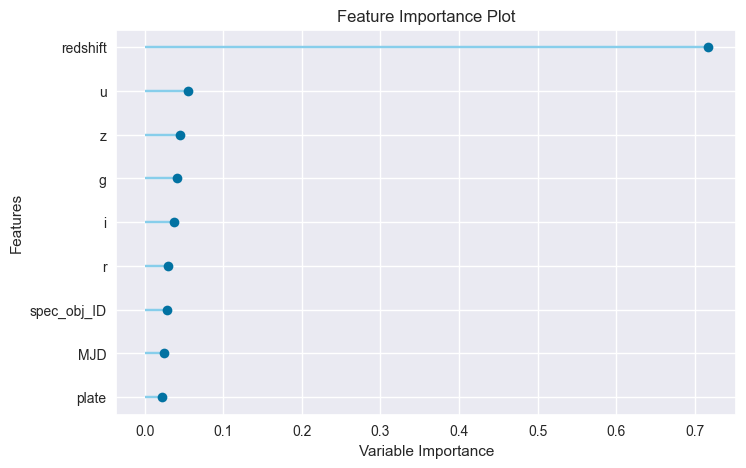

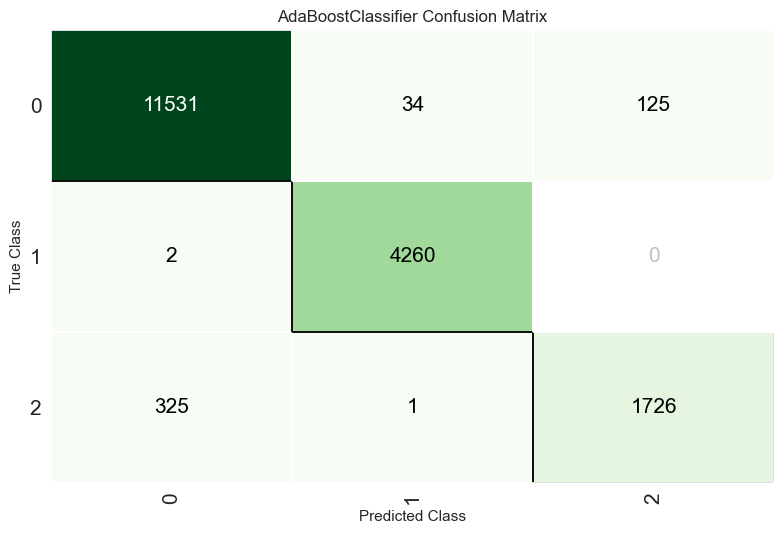

In [25]:
plot_model(rf_boost,plot='class_report')
plot_model(rf_boost,plot='feature')
plot_model(rf_boost,plot='confusion_matrix')
# plot_model(rf_boost,plot='learning')

In [26]:
previsao = predict_model(rf_boost,data=teste)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9738,0.9937,0.9738,0.9734,0.9734,0.9484,0.9486


In [27]:
truelabels = previsao['class']
prevlabels = previsao['prediction_label']
matriz = confusion_matrix(truelabels,prevlabels)

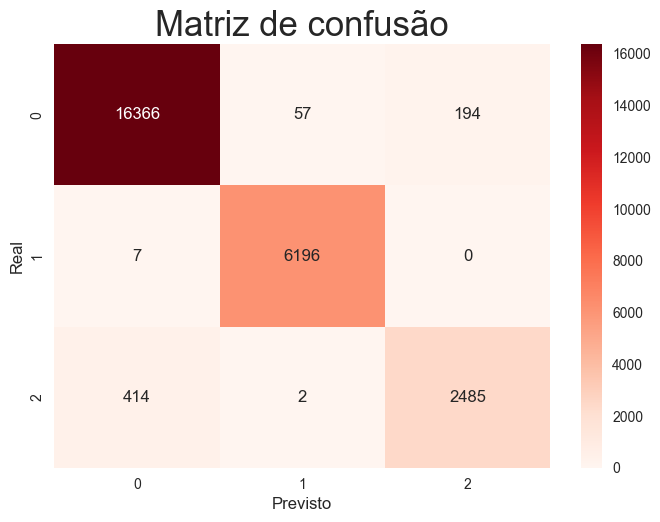

<Figure size 1000x1000 with 0 Axes>

In [28]:
sns.heatmap(matriz,annot=True,fmt='d',cmap='Reds')
pplt.xlabel('Previsto',fontsize=12)
pplt.ylabel('Real',fontsize=12)
pplt.title('Matriz de confusão',fontsize=25)
pplt.show()
pplt.figure(figsize=(10,10))
pplt.show()

In [29]:
report = classification_report(truelabels,prevlabels)
print(report)
print(type(report))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     16617
           1       0.99      1.00      0.99      6203
           2       0.93      0.86      0.89      2901

    accuracy                           0.97     25721
   macro avg       0.96      0.95      0.96     25721
weighted avg       0.97      0.97      0.97     25721

<class 'str'>
